<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6426 entries, 0 to 6425
Data columns (total 5 columns):
location    6426 non-null object
srs         6426 non-null object
modified    6426 non-null object
created     6426 non-null object
geometry    6426 non-null object
dtypes: object(5)
memory usage: 251.1+ KB
{'init': 'epsg:4326'} ['EPSG:26972' 'EPSG:4326']


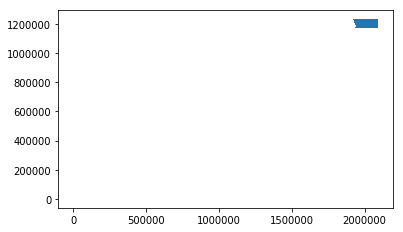

In [40]:
%matplotlib inline
import geopandas as gpd

df = gpd.read_file('adams.gpkg')
df.info()
print(df.crs, df['srs'].unique())
df.plot()

In [41]:
df[df['srs']!='EPSG:4326'].head()

,location,srs,modified,created,geometry
0,/data/lidar/adams/las_classified/1280_1930.las,EPSG:26972,2009-10-20T00:37:09,2018-12-13T21:46:57,POLYGON ((-91.47852667224002 40.17411279626138...
1,/data/lidar/adams/las_classified/1156_2086.las,EPSG:26972,2009-10-19T22:34:02,2018-12-13T21:46:57,POLYGON ((-90.91659129758993 39.83871065542411...
4,/data/lidar/adams/las_classified/1240_1992.las,EPSG:26972,2009-10-19T23:15:51,2018-12-13T21:46:57,POLYGON ((-91.25494238878736 40.06662605018638...
5,/data/lidar/adams/las_classified/1158_2038.las,EPSG:26972,2009-10-19T22:36:31,2018-12-13T21:46:57,POLYGON ((-91.08758222031362 39.84296981592355...
6,/data/lidar/adams/las_classified/1126_2046.las,EPSG:26972,2009-10-19T21:41:56,2018-12-13T21:46:57,POLYGON ((-91.05795973768863 39.75535188608443...


In [42]:
badproj = df[df['srs']=='EPSG:4326']
badproj.crs = {'init': 'EPSG:3444'}
badproj.head()

,location,srs,modified,created,geometry
2,/data/lidar/adams/las_classified/2066_1216.las,EPSG:4326,2009-10-19T23:56:13,2018-12-13T21:46:57,"POLYGON ((2065999.99 1216000, 2065999.99 12179..."
3,/data/lidar/adams/las_classified/1966_1234.las,EPSG:4326,2009-10-19T22:18:49,2018-12-13T21:46:57,"POLYGON ((1966000.01 1234000, 1966000.01 12359..."
7,/data/lidar/adams/las_classified/2060_1228.las,EPSG:4326,2009-10-19T23:51:00,2018-12-13T21:46:57,"POLYGON ((2060000 1228000.01, 2060000 1229999...."
10,/data/lidar/adams/las_classified/1982_1188.las,EPSG:4326,2009-10-19T22:34:25,2018-12-13T21:46:57,"POLYGON ((1982000 1188000.01, 1982000 1189999...."
18,/data/lidar/adams/las_classified/1974_1188.las,EPSG:4326,2009-10-19T22:26:13,2018-12-13T21:46:57,"POLYGON ((1973999.99 1188000, 1973999.99 11899..."


In [43]:
badproj = badproj.to_crs({'init': 'EPSG:4326'})
badproj['srs'] = 'EPSG:3444'
badproj.head()

,location,srs,modified,created,geometry
2,/data/lidar/adams/las_classified/2066_1216.las,EPSG:3444,2009-10-19T23:56:13,2018-12-13T21:46:57,"POLYGON ((-90.98977805630592 40.0029290734882,..."
3,/data/lidar/adams/las_classified/1966_1234.las,EPSG:3444,2009-10-19T22:18:49,2018-12-13T21:46:57,POLYGON ((-91.34753807035025 40.04924836807506...
7,/data/lidar/adams/las_classified/2060_1228.las,EPSG:3444,2009-10-19T23:51:00,2018-12-13T21:46:57,"POLYGON ((-91.0116002011097 40.03571439480291,..."
10,/data/lidar/adams/las_classified/1982_1188.las,EPSG:3444,2009-10-19T22:34:25,2018-12-13T21:46:57,POLYGON ((-91.28832837292254 39.92355897228033...
18,/data/lidar/adams/las_classified/1974_1188.las,EPSG:3444,2009-10-19T22:26:13,2018-12-13T21:46:57,POLYGON ((-91.31684743385061 39.92327952879813...


In [44]:
df[df['srs']=='EPSG:4326'] = badproj
df.head()

,location,srs,modified,created,geometry
0,/data/lidar/adams/las_classified/1280_1930.las,EPSG:26972,2009-10-20T00:37:09,2018-12-13T21:46:57,POLYGON ((-91.47852667224002 40.17411279626138...
1,/data/lidar/adams/las_classified/1156_2086.las,EPSG:26972,2009-10-19T22:34:02,2018-12-13T21:46:57,POLYGON ((-90.91659129758993 39.83871065542411...
2,/data/lidar/adams/las_classified/2066_1216.las,EPSG:3444,2009-10-19T23:56:13,2018-12-13T21:46:57,"POLYGON ((-90.98977805630592 40.0029290734882,..."
3,/data/lidar/adams/las_classified/1966_1234.las,EPSG:3444,2009-10-19T22:18:49,2018-12-13T21:46:57,POLYGON ((-91.34753807035025 40.04924836807506...
4,/data/lidar/adams/las_classified/1240_1992.las,EPSG:26972,2009-10-19T23:15:51,2018-12-13T21:46:57,POLYGON ((-91.25494238878736 40.06662605018638...


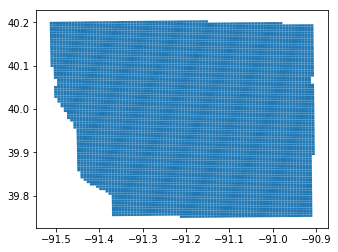

In [45]:
df.plot()

In [46]:
df.to_file('adams_fix.gpkg', driver='GPKG')